In [1]:
# VLE calculation for Chloroform(1)/Methanol(2) binary mixture using Bubble-P algorithm

import numpy as np
import math
import array as arr
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os

In [2]:
def volumecal (a,b,P,T,eos,aplha_eos):
    
    Delv = 1
    Vold = (8.314*T)/(P) #initial guess
    if eos == 1:    
        while Delv > 0.001:
            Vnew = ((8.314*T)/(P+(a/(Vold*Vold))))+b
            Delv = abs(Vnew - Vold)
            Vold = Vnew
        V = Vold
#    print("Value of Volume in function is", V)
        return V
    elif eos == 2:
        while Delv > 0.001:
            Vnew = b + ((8.314*T)/(P+(a/(Vold*(Vold+b)*(T**0.5)))))
            Delv = abs(Vnew - Vold)
            Vold = Vnew
        V = Vold
#    print("Value of Volume in function is", V)
        return V
    elif eos == 3:
        while Delv > 0.001:
            Vnew = b + ((8.314*T)/(P+(a/(Vold*(Vold+b)))))
            Delv = abs(Vnew - Vold)
            Vold = Vnew
        V = Vold
#    print("Value of Volume in function is", V)
        return V
    elif eos == 4:
        while Delv > 0.001:
            Vnew = b + ((8.314*T)/(P+(a/((Vold*Vold)+(2*b*Vold)-(b*b)))))
            Delv = abs(Vnew - Vold)
            Vold = Vnew
        V = Vold
#    print("Value of Volume in function is", V)
        return V
#V = volumecal(2,3,10,325.15)
#print("Volume is :",V)
            

In [3]:
def mixingrule (a1,b1,a2,b2,Y1,Y2,eos,mix,alpha_eos_1,alpha_eos_2,T,case,A12,A21,V1_L,V2_L,alpha):
    if mix == 1:
        b12 = 0.5*(b1+b2)
        a12 = (a1*a2)**0.5
        bmix = (Y1*Y1*b1) + (Y2*Y2*b2) + (2*Y1*Y2*b12)
        amix = (Y1*Y1*a1) + (Y2*Y2*a2) + (2*Y1*Y2*a12)
    #   print("Value of amix in function is : ",amix)
    #   print("Value of bmix in function is : ", bmix)
        return (amix,bmix,a12,b12)
    elif mix == 2:
        a12 = (a1*alpha_eos_1*a2*alpha_eos_2)**0.5
        b12 = 0.5*(b1+b2)
        amix = (Y1*Y1*a1*alpha_eos_1) + (Y2*Y2*a2*alpha_eos_2) + (2*Y1*Y2*a12)
        bmix = (Y1*b1) + (Y2*b2)
        return(amix,bmix,a12,b12)
    
    elif mix == 3:
        a12 = (a1*alpha_eos_1*a2*alpha_eos_2)**0.5
        b12 = 0.5*(b1+b2) 
        A1 = ((Y1 * a1) / b1) + ((Y2 * a2) / b1)
        A2 = ((Y1 * Y1 *a1) + (2 * Y1 * Y2 * a12) + (Y2 * Y2 *a2)) / ((Y1 * Y1 * b1) + (2 * Y1 * Y2 * b12) + (Y2 * Y2 *b2))
        A_E_Inf = A1 - A2
        kij = 0.21 #guess
        p11 = b1 - ((a1)/(8.314*T))
        p22 = b2 - ((a2)/(8.314*T))
        p12 = (p11 + p22) * 0.5 * (1-0.21)
        bmix = ((Y1 * Y1 * p11) + (2*Y1*Y2*p12) + (Y2*Y2*p22)) / ((1) + ((A_E_Inf)/(8.314*T)) - ((Y1*a1)/(b1*8.314*T)) - ((Y2*a2)/(b2*8.314*T)))
        amix = bmix * (((Y1*a1)/b1) + ((Y2*a2)/b2) - A_E_Inf)
        return(amix,bmix,a12,b12)
    
    elif mix == 4:    
        k12 = 0.21
        k21 = 0.50
        a12 = ((a1*a2)**0.5) * ((1-k12) + ((k12 - k21) * Y1))
        a21 = ((a1*a2)**0.5) * ((1-k21) + ((k21 - k12) * Y2))
        amix = (Y1*Y1*a1) + (Y2*Y2*a2) + ((Y1*Y2) * (a12 + a21))
        b12 = (b1 + b2) * 0.5
        bmix = (Y1 * b1) + (Y2 * b2)
        return(amix,bmix,a12,b12)
    
#    elif mix == 4 and eos == 1 and case == 1:
#        kij = 0.21 #guess
#        a12 = (a1 + a2) *0.5 *(1-kij)
#        b12 = (b1 + b2)* 0.5 * (1-kij)
#        print("a12 is :",a12)
#        print("b12 is :",b12)
#        A_E_Inf = (Y1*Y2) *((A21*Y1) + (A12*Y2)) * 8.314 * T
#        p11 = b1 - ((a1)/(8.314*T))
#        p22 = b2 - ((a2) / (8.314*T))
#        p12 = (p11 + p22)*0.5*(1-kij)
#        p21 = (p22 + p11)*0.5*(1-kij)
#        bmix = ((Y1*Y1*p11) + (Y1*Y2*p12) +(Y1*Y2*p21) + (Y2*Y2*p22)) / ((1) + ((A_E_Inf) / (8.314*T)) - ((Y1*a1) / (b1*8314*T)) - ((Y2*a2) / (b2*8.314*T)))
#        amix = bmix * ( ( (Y1*a1) / (b1) ) + ( (Y2*a2) / (b2) ) - A_E_Inf )
#        mix = mix +1
#        print("mix is :",mix)
#        return(amix,bmix,a12,b12)
        
#    elif mix == 4 and eos == 1 and case == 2: 
#        kij = 0.21 #guess
#        a12 = (a1 + a2) *0.5 *(1-kij)
#        b12 = (b1 + b2)* 0.5 * (1-kij)
#        print("asd",a12)
#        A_E_Inf = (8.314 * T * Y1 * Y2) * ((A12 * A21) / ((A21 * Y1) + (A12 * Y2)))
#        p11 = b1 - ((a1)/(8.314*T))
#        p22 = b2 - ((a2) / (8.314*T))
#        p12 = (p11 + p22)*0.5*(1-kij)
#        p21 = (p22 + p11)*0.5*(1-kij)
#        bmix = ((Y1*Y1*p11) + (Y1*Y2*p12) +(Y1*Y2*p21) + (Y2*Y2*p22)) / ((1) + ((A_E_Inf) / (8.314*T)) - ((Y1*a1) / (b1*8314*T)) - ((Y2*a2) / (b2*8.314*T)))
#        amix = bmix * ( ( (Y1*a1) / (b1) ) + ( (Y2*a2) / (b2) ) - A_E_Inf )
#        return(amix,bmix,a12,b12)
        
#    elif mix == 4 and eos == 1 and case == 3:
#        kij = 0.21 #guess
#        a12 = (a1 + a2) *0.5 *(1-kij)
#        b12 = (b1 + b2)* 0.5 * (1-kij)
#        G12 = (V2_L/V1_L)*(np.exp(-A12/(8.314*T)))
#        G21 = (V1_L/V2_L)*(np.exp(-A21/(8.314*T)))
#        D1 = (np.log(Y1 + (G12 * Y2))) * (-Y1)
#        D2 = (np.log(Y2 + (G12 * Y1))) * (-Y2)
#        A_E_Inf = (8.314 * T) * (D1 + D2)
#        p11 = b1 - ((a1)/(8.314*T))
#        p22 = b2 - ((a2) / (8.314*T))
#        p12 = (p11 + p22)*0.5*(1-kij)
#        p21 = (p22 + p11)*0.5*(1-kij)
#        bmix = ((Y1*Y1*p11) + (Y1*Y2*p12) +(Y1*Y2*p21) + (Y2*Y2*p22)) / ((1) + ((A_E_Inf) / (8.314*T)) - ((Y1*a1) / (b1*8314*T)) - ((Y2*a2) / (b2*8.314*T)))
#        amix = bmix * ( ( (Y1*a1) / (b1) ) + ( (Y2*a2) / (b2) ) - A_E_Inf )
#        return(amix,bmix,a12,b12)
        
#    elif mix == 4 and eos == 1 and case == 4: 
#        kij = 0.21 #guess
#        a12 = (a1 + a2) *0.5 *(1-kij)
#        b12 = (b1 + b2)* 0.5 * (1-kij)
#        G12 = np.exp((-1)*alpha*A12)
#        G21 = np.exp((-1)*alpha*A21)
#        D1 = ((A21 * G21) / (Y1 + (Y2 * G21)))
#        D2 = ((A12 * G12) / (Y2 + (Y1 * G12)))
#        A_E_Inf = (8.314 * T * Y1 *Y2) * (D1 + D2)
#        p11 = b1 - ((a1)/(8.314*T))
#        p22 = b2 - ((a2) / (8.314*T))
#        p12 = (p11 + p22)*0.5*(1-kij)
#        p21 = (p22 + p11)*0.5*(1-kij)
#        bmix = ((Y1*Y1*p11) + (Y1*Y2*p12) +(Y1*Y2*p21) + (Y2*Y2*p22)) / ((1) + ((A_E_Inf) / (8.314*T)) - ((Y1*a1) / (b1*8314*T)) - ((Y2*a2) / (b2*8.314*T)))
#        amix = bmix * ( ( (Y1*a1) / (b1) ) + ( (Y2*a2) / (b2) ) - A_E_Inf )
#        return(amix,bmix,a12,b12)
    
    
        
# a,b = mixingruke (1,1,1,1,1,1)
# print (a,b)




In [4]:
def initialvalue ():

# STEP1: Input Temperature
    T = float(input("Enter the Temperature of system in K:"))

# Antoine constant input for Chloroform(1)
    if T >= 215 and T <=334.4:
        A1 = 4.20772
        B1 = 1233.129
        C1 = -40.953
    elif T > 334.4 and T <= 527:
        A1 = 4.56992
        B1 = 1486.455
        C1 = -8.612


# Antoine constant input for Methanol (2) in range

# Antoine constant input for Benzene (2) Values from NIST Webbook
    if T >= 288.1 and T <= 356.83:
        A2 = 5.20409
        B2 = 1581.341
        C2 = -33.50
    elif T > 356.83 and T <= 512.63:
        A2 = 5.15853
        B2 = 1569.613
        C2 = -34.846

# Pure component saturated volume at T = T input
#v1 =  0.000080108561 # m3/mol from NIST at 298.15K
#v2 = 4.0754*0.000011 # m3/mol at 298.15K
    V1_L = 0.00008010856 #Si unit
    V2_L = 4.0754*0.00001 # Si unit

#Pure component properties

    Pc_1 = 53.2868*100000  # Pa from NIST
    Vc_1 = 0.00024331 # m3 per mole from NIST
    Tc_1 = 537.2      # K from NIST

    Pc_2 = 81*100000  # Pa from NIST
    Vc_2 = 0.118*0.001 # m3 per mole from NIST
    Tc_2 = 513    # K from NIST

#Input constants of 3 suffix Margulus equation
    print("\nSelect the Equation of State to be used from below:")
    print("\nEnter 1 for Van der Waals Equation of State")
    print("Enter 2 for Redlich - Kwong Equation of State")
    print("Enter 3 for Redlich - Kwong- Soave Equation of State")
    print("Enter 4 for Peng - Robinson Equation of State")
    eos = int(input("\nEnter the number corresponding to the Equation of State which is to be used:"))
    
    # Finding EOS constants
    if eos == 1:
        a1 = (27*8.314*8.314*Tc_1*Tc_1)/(64*Pc_1)
        b1 = (8.314*Tc_1)/(8*Pc_1)
        a2 = (27*8.314*8.314*Tc_2*Tc_2)/(64*Pc_2)
        b2 = (8.314*Tc_2)/(8*Pc_2)
        omega_eos_1 = 1
        alpha_eos_1 = 1
        omega_eos_2 = 1
        alpha_eos_2 = 1
    elif eos == 2:
        sigmaa = 1/(9*((2**0.3333)-1))
        sigmab = ((2**0.3333)-1) / 3
        a1 = (sigmaa*8.314*8.314*(Tc_1**2.5))/(Pc_1)
        b1 = (sigmab*8.314*Tc_1)/(Pc_1)
        a2 = (sigmaa*8.314*8.314*(Tc_2**2.5))/(Pc_2)
        b2 = (sigmab*8.314*Tc_2)/(Pc_2)
        omega_eos_1 = 1
        alpha_eos_1 = 1
        omega_eos_2 = 1
        alpha_eos_2 = 1
    elif eos == 3:
        a1 = (0.42747*8.314*8.314*Tc_1*Tc_1)/Pc_1
        b1 = (0.08664*8.314*Tc_1)/Pc_1
        a2 = (0.42747*8.314*8.314*Tc_2*Tc_2)/Pc_2
        b2 = (0.08664*8.314*Tc_2)/Pc_2
        
        temperature_1 = 0.7*Tc_1
        Pr_sat_1 = ((10**(A1-(B1/(temperature_1+C1))))*100000)/(Pc_1)
        omega_eos_1 = -1-math.log10(Pr_sat_1)
        m_1 = 0.48508+(1.55171*omega_eos_1)-(0.15613*omega_eos_1*omega_eos_1)
        n_1 = (1-((T/Tc_1)**0.5))
        alpha_eos_1 = (1+(m_1*n_1))**2
        
        temperature_2 = 0.7*Tc_2
        Pr_sat_2 = ((10**(A2-(B2/(temperature_2+C2))))*100000)/(Pc_2)
        omega_eos_2 = -1-math.log10(Pr_sat_2)
        m_2 = 0.48508+(1.55171*omega_eos_2)-(0.15613*omega_eos_2*omega_eos_2)
        n_2 = (1-((T/Tc_2)**0.5))
        alpha_eos_2 = (1+(m_2*n_2))**2
    elif eos == 4:
        a1 = (0.45724*8.314*8.314*Tc_1*Tc_1)/(Pc_1)
        b1 = (0.07780*8.314*Tc_1)/(Pc_1)
        a2 = (0.45724*8.314*8.314*Tc_2*Tc_2)/(Pc_2)
        b2 = (0.07780*8.314*Tc_2)/(Pc_2)
        
        temperature_1 = 0.7*Tc_1
        Pr_sat_1 = ((10**(A1-(B1/(temperature_1+C1))))*100000)/Pc_1
        omega_eos_1 = -1-math.log10(Pr_sat_1)
        m_1 = 0.37464+(1.54226*omega_eos_1)-(0.26992*omega_eos_1*omega_eos_1)
        n_1 = (1-((T/Tc_1)**0.5))
        alpha_eos_1 = (1+(m_1*n_1))**2
        
        temperature_2 = 0.7*Tc_2
        Pr_sat_2 = ((10**(A2-(B2/(temperature_2+C2))))*100000)/Pc_2
        omega_eos_2 = -1-math.log10(Pr_sat_2)
        m_2 = 0.37464+(1.54226*omega_eos_2)-(0.26992*omega_eos_2*omega_eos_2)
        n_2 = (1-((T/Tc_2)**0.5))
        alpha_eos_2 = (1+(m_2*n_2))**2
    #else: 
        #print("Using dfault Vander waals Equation of State")
        #a1 = (27*8.314*8.314*Tc_1*Tc_1)/(64*Pc_1)
        #b1 = (8.314*Tc_1)/(8*Pc_1)
        #a2 = (27*8.314*8.314*Tc_2*Tc_2)/(64*Pc_2)
        #b2 = (8.314*Tc_2)/(8*Pc_2) 
        #omega_eos_1 = 0
        #alpha_eos_1 = 0
        #omega_eos_2 = 0
        #alpha_eos_2 = 0
    
    print("\nSelect mixing rule from below:")
    print("\nEnter 1 for arithmatic, Geometric and Berthelot mixing rule for Van der Waals or Redlich - Kwong Equation of State")
    print("Enter 2 for normal mixing rule for Redlich - Kwong- Soave or Peng - Robinson Equation of State  ")
    print("Enter 3 for mixing rule proposed by Huron and Vidal 1979")
    print("Enter 4 for mixing rule proposed by Panagiotopoulos et.al 1989")
    mix = int(input("\nEnter the number corresponding to the mixing rule which is to be used:"))
    
    print("\nSelect activity coefficient model from below:")
    print("\nEnter 1 for activity coefficients calculation by 3 Suffix Margulus equation")
    print("Enter 2 for activity coefficients calculation by Van Laar equation")
    print("Enter 3 for activity coefficients calculation by Wilson equation")
    print("Enter 4 for activity coefficients calculation by NRTL equation")
    #print("Enter constants of activity coefficient model")
    case = int(input("\nEnter the number corresponding to the activity coefficient calculation model:"))
    if case == 1:
        #Taken from nagata1992 paper
        A12 = 0.37
        A21 = 0.73
        alpha = 0.30
#        print("case is :",case)
    elif case == 2:
        # Taken from martin1992 paper
        A12 = 0.9050 
        A21 = 2.3542
        alpha = 0.30
#        print("case is :",case)
    elif case == 3:
        #Taken from martin1992 paper
        A12 = -246.1952
        A21 = 245.99898
        alpha = 0.30
#        print("case is :",case)
    elif case == 4:
        #Taken from martin1992 paper
        A12 = 0.4597
        A21 = 1.0976
        alpha = 0.30
#        print("case is :",case)
    #else:
        #print("Using default of 3- Suffix Margulus equation")
        #A12 = -0.0487
        #A21 = -0.0492
        #alpha = 0.3048
        #print("case is :",case)
        

#Input x values
    #X1 = []
    # number of elements as input
    #n = int(input("Enter number of elements : "))
    # iterating till the range
    #for i in range(0, n):
        #x1 = float(input())
        #X1.append(x1)
    #X1 = arr.array('f', [0,0.0361,0.0923,0.1674,0.2328,0.2655,0.2900,0.3215,0.4133,0.4820,0.5219,0.5573,0.5831,0.6065,0.6285,0.6535,0.6787,0.6970,0.7043,0.7296,0.7614,0.7919,0.8206,0.8476,0.8725,0.8952,0.9331,0.9476,0.9601,0.9702,0.97830.9848,0.9892,0.9601,0.9923,0.9944,0.9966,0.9987,1])
    X1 =[0.101,0.202,0.305,0.410,0.504,0.598,0.680,0.792,0.897]
    print("Lenght of vector X1 is :",len(X1))
    X2 = arr.array('f',[])
   # Finding X2

    for i in range(len(X1)):
        x2 = 1 - X1[i]
        X2.append(x2)

#Fugacity coefficients equal to 1

    Phi_1 = 1
    Phi_2 = 1

#Poynting correction factor equal to 1

    Pcf_1 = 1
    Pcf_2 = 1

# STEP 2

    P1sat = 100000*(10**(A1-(B1/(T+C1)))) #Pressure in si unit
    P2sat = 100000*(10**(A2-(B2/(T+C2)))) #Pressure in si unit
    print("P1sat is:",P1sat)
    print("P2sat is:",P2sat)


    #print(a1,b1,a2,b2,X2)
   # print("X1 isequal to :",X1)
   # print("X2 isequal to :",X2)
    return (T,P1sat,P2sat,X1,X2,a1,b1,a2,b2,A12,A21,V1_L,V2_L,Phi_1,Phi_2,Pcf_1,Pcf_2,case,alpha,eos,omega_eos_1,alpha_eos_1,omega_eos_2,alpha_eos_2,mix)
#T,P1sat,P2sat,X1,X2,a1,b1,a2,b2,A12,A21,V1_L,V2_L,Phi_1,Phi_2,Pcf_1,Pcf_2,n,case,alpha,eos = initialvalue()
#print(a1,b1,a2,b2,X1,X2,P1sat,P2sat,T)

In [5]:
def Zcal (Psat,Vsat,T):
    Z = (Psat*Vsat)/(8.314*T)
    #print("Value of Z in funtion is :",Z)
    return Z
#Z = Zcal(10,10,320)
#print(Z)


In [6]:
def phisatcal (Z1,Z2,a1,b1,a2,b2,V1sat,V2sat,T,eos,alpha_eos_1,alpha_eos_2):
    if eos == 1:
        Ln_phi_1_sat = (-1)*(math.log(1-(b1/V1sat))+(a1/(V1sat*8.314*T))+(math.log(Z1))+(1-Z1))
       # print("Ln_phi_1_sat",Ln_phi_1_sat)
        Ln_phi_2_sat = (-1)*(math.log(1-(b2/V1sat))+(a2/(V2sat*8.314*T))+(math.log(Z2))+(1-Z2))
        #print("Ln_phi_2_sat",Ln_phi_2_sat)
        Phi_1_sat = math.exp(Ln_phi_1_sat)
        #print("Phi_1_sat",Phi_1_sat)
        Phi_2_sat = math.exp(Ln_phi_2_sat)
        #print("Phi_2_sat",Phi_2_sat)
        print("Value of Phi_1_sat is :",Phi_1_sat)
        print("Value of Phi_2_sat is :",Phi_2_sat)
        return (Phi_1_sat,Phi_2_sat)
    elif eos == 2:
        Ln_phi_1_sat = (-1)*(1+(a1/(b1*8.314*(T**1.5))))*(math.log(1-(b1/V1sat))) - math.log(Z1) + (Z1-1)
        Ln_phi_2_sat = (-1)*(1+(a2/(b2*8.314*(T**1.5))))*(math.log(1-(b2/V2sat))) - math.log(Z2) + (Z2-1)
        Phi_1_sat = math.exp(Ln_phi_1_sat)
        Phi_2_sat = math.exp(Ln_phi_2_sat)
        print("Value of Phi_1_sat is :",Phi_1_sat)
        print("Value of Phi_2_sat is :",Phi_2_sat)
        return (Phi_1_sat,Phi_2_sat)
    elif eos == 3:
        Ln_phi_1_sat = (-1)*(1+((a1*alpha_eos_1)/(b1*8.314*T)))*(math.log(1-(b1/V1sat)))-math.log(Z1)+(Z1-1)
        Ln_phi_2_sat = (-1)*(1+((a2*alpha_eos_2)/(b2*8.314*T)))*(math.log(1-(b2/V2sat)))-math.log(Z2)+(Z2-1)
        Phi_1_sat = math.exp(Ln_phi_1_sat)
        Phi_2_sat = math.exp(Ln_phi_2_sat)
        print("Value of Phi_1_sat is :",Phi_1_sat)
        print("Value of Phi_2_sat is :",Phi_2_sat)
        return (Phi_1_sat,Phi_2_sat)
    elif eos ==4:
        Ln_phi_1_sat = (-1)*(math.log(1-(b1/V1sat))) - ((a1*alpha_eos_1)/(2*1.414*8.314*b1*T))*math.log(abs(((2.414*b1)+V1sat)/((0.414*b1)-V1sat))) - math.log(Z1) + (Z1-1)
        Ln_phi_2_sat = (-1)*(math.log(1-(b2/V2sat))) - ((a2*alpha_eos_2)/(2*1.414*8.314*b2*T))*math.log(abs(((2.414*b2)+V2sat)/((0.414*b2)-V2sat))) - math.log(Z2) + (Z2-1)
        Phi_1_sat = math.exp(Ln_phi_1_sat)
        Phi_2_sat = math.exp(Ln_phi_2_sat)
        print("Value of Phi_1_sat is :",Phi_1_sat)
        print("Value of Phi_2_sat is :",Phi_2_sat)
        return(Phi_1_sat,Phi_2_sat)
    
                                                                                              
                                                                    
#phi1sat,phi2sat = phisatcal(1,1,0.5,0.4,0.2,0.54,14,15,320)
#print(phi1sat,phi2sat)

In [7]:
def gammacal (x1,x2,A12,A21,case,alpha,V1_L,V2_L):
    
    if case == 1:
        gamma1 = math.exp(((x2**2)*(2*(A21-A12)*x1)) + A12)
        gamma2 = math.exp(((x1**2)*(2*(A12-A21)*x2)) + A21)
        #print("Value of gamma1 in function is :",gamma1)
        #print("Value of gamma2 in function is :",gamma2)
        #print("Valus of case inside the function is :",case)
        return (gamma1,gamma2)
    elif case == 2:
        A = ((A21*x2)/((A12*x1)+(A21*x2)))**2
        B = ((A12*x1)/((A12*x1)+(A21*x2)))**2
        gamma1 = math.exp(A12*A)
        gamma2 = math.exp(A21*B)
        #print("Valus of case inside the function is :",case)
        return (gamma1,gamma2)
    elif case == 3:
        G12 = (V2_L/V1_L)*(np.exp(-A12/(8.314*T)))
        G21 = (V1_L/V2_L)*(np.exp(-A21/(8.314*T)))
        D1 = (-1)*(np.log(x1+(G12*x2)))
        D2 = (G12)/(x1+(G12*x2))
        D3 = (G21)/(x2+(G21*x1))
        gamma1 = np.exp(D1+(x2*(D2-D3)))
        #print("gamma1 is clear with value of :",gamma1)
        E1 = (-1)*(np.log(x2+(G21*x1)))
        E2 = (G12)/(x1+(G12*x2))
        E3 = (G21)/(x2+(G21*x1))
        gamma2 = np.exp(E1+(x1*(E2-E3)))
        #gamma1 = math.exp((-1)*(math.log(x1+(x2*A12))) + (x2)*(((A12)/(x1+(x2*A12))) - ((A21)/(x2+(x1*A21)))))
        #gama2 =  math.exp((-1)*(math.log(x2+(x1*A21))) + (x1)*(((A12)/(x1+(x2*A12))) - ((A21)/(x2+(x1*A21)))))
        #print("Valus of case inside the function is :",case)
        return (gamma1,gamma2)
    elif case == 4:
        G12 = np.exp((-1)*alpha*A12)
        G21 = np.exp((-1)*alpha*A21)
        A1 = ((G21)/(x1+(x2*G21)))**2
        A2 = (((G12)/(x2+(x1*G12)))**2)/(G12)
        gamma1 = np.exp(x2*x2*((A21*A1) + (A12*A2)))
        B1 = ((G12)/(x2+(x1*G12)))**2
        B2 = (((G21)/(x1+(x2*G21)))**2)/(G21)
        gamma2 = np.exp(x1*x1*((A12*B1) + (A21*B2)))
        #print("Valus of case inside the function is :",case)
        return(gamma1,gamma2)
    #else:
        #gamma1 = math.exp(((x2**2)*(2*(A21-A12)*x1)) + A12)
        #gamma2 = math.exp(((x1**2)*(2*(A12-A21)*x2)) + A21)
        #print("Valus of case inside the function is :",case)
        #print("Value of gamma1 in function is :",gamma1)
        #print("Value of gamma2 in function is :",gamma2)
        return (gamma1,gamma2)

#gamma1,gamma2 = gammacal(0.5,0.5,-0.0487,-0.0492)
#print(gamma1,gamma2)

    

In [8]:
def Pcal (x1,x2,gamma1,gamma2,P1sat,P2sat,Phi_1_sat,Phi_2_sat,Phi_1,Phi_2,Pcf_1,Pcf_2):
    P = ((x1*gamma1*P1sat*Phi_1_sat*Pcf_1)/(Phi_1)) + ((x2*gamma2*P2sat*Phi_2_sat*Pcf_2)/(Phi_2))
#    print("Value of Pcal in function is :",P)
    return P

    


In [9]:
def Ycal (x1,x2,gamma1,gamma2,P1sat,P2sat,Phi_1_sat,Phi_2_sat,Pcf_1,Pcf_2,Phi_1,Phi_2,P):
    import numpy as np
    import math
    import array as arr
    y1 = (x1*gamma1*P1sat*Phi_1_sat*Pcf_1)/(Phi_1*P)
    y2 = (x2*gamma2*P2sat*Phi_2_sat*Pcf_2)/(Phi_2*P)     
#    print("Value of Y1 in function is :",y1)
#    print("Value of Y2 in function is :",y2)
    return (y1,y2)
        

In [10]:
def PCF (P,P1sat,P2sat,V1_L,V2_L,T):
    import numpy as np
    import math
    import array as arr
    Pcf_1 = math.exp(((P-P1sat)*V1_L)/(8.314*T))
    Pcf_2 = math.exp(((P-P2sat)*V2_L)/(8.314*T))
#    print("Value of Pcf_1 in function is :",Pcf_1)
#    print("Value of Pcf_2 in function is :",Pcf_2)
    return (Pcf_1,Pcf_2)
#Pcf_1,Pcf_2 = PCF(10,12,14,0.25,0.254,325)
#print (Pcf_1,Pcf_2)



In [11]:
def Phical (Vmix,bmix,a12,y1,y2,T,Pold,eos,a1,b1,a2,b2,a11,a22,amix):
  
    if eos == 1:
        ln_phi_1 = math.log(Vmix/(Vmix-bmix)) + (b1/(Vmix-bmix)) - math.log((Pold*Vmix)/(8.314*T)) - ((2*(y1*a1+y2*a12))/(Vmix*8.314*T))
        ln_phi_2 = math.log(Vmix/(Vmix-bmix)) + (b2/(Vmix-bmix)) - math.log((Pold*Vmix)/(8.314*T)) - ((2*(y1*a12+y2*a2))/(Vmix*8.314*T))
        phi_1 = math.exp(ln_phi_1)
        phi_2 = math.exp(ln_phi_2)
    #    print("Value of phi_1 in the function is :",phi_1)
    #    print("Value of phi_2 in the function is :",phi_2)
        return (phi_1,phi_2)
    
    elif eos == 2:
        zmix = (Pold*Vmix)/(8.314*T)
        ln_phi_1 = (b1/bmix)*(zmix-1) - math.log(zmix*(1-(bmix/Vmix))) + ((bmix*8.314*(T**1.5))**(-1))*(math.log(1+(bmix/Vmix)))*((amix*b1)/(bmix)-2*((y1*a1)+(y2*a12)))
        ln_phi_2 = (b2/bmix)*(zmix-1) - math.log(zmix*(1-(bmix/Vmix))) + ((bmix*8.314*(T**1.5))**(-1))*(math.log(1+(bmix/Vmix)))*((amix*b2)/(bmix)-2*((y1*a12)+(y2*a2)))
        phi_1 = math.exp(ln_phi_1)
        phi_2 = math.exp(ln_phi_2)
        return(phi_1,phi_2)
    
    elif eos == 3:
        zmix = (Pold*Vmix)/(8.314*T)
        ln_phi_1 = (b1/bmix)*(zmix-1) - math.log(zmix*(1-(bmix/Vmix))) + ((bmix*8.314*(T**1.5))**(-1))*(math.log(1+(bmix/Vmix)))*((amix*b1)/(bmix)-2*((y1*a11)+(y2*a12)))
        ln_phi_2 = (b2/bmix)*(zmix-1) - math.log(zmix*(1-(bmix/Vmix))) + ((bmix*8.314*(T**1.5))**(-1))*(math.log(1+(bmix/Vmix)))*((amix*b2)/(bmix)-2*((y1*a12)+(y2*a22)))
        phi_1 = math.exp(ln_phi_1)
        phi_2 = math.exp(ln_phi_2)
        return(phi_1,phi_2)
    
    elif eos == 4:
        zmix = (Pold*Vmix)/(8.314*T)
#        ln_phi_1 = 24
#        ln_phi_2 = 14
        ln_phi_1 = (b1/bmix)*(zmix-1) - math.log(zmix*(1-(bmix/Vmix))) + ((amix)/(2*1.414*bmix*8.314*T))*(math.log((Vmix+(2.414*bmix))/(Vmix-(0.414*bmix))))*((b1/bmix)-2*((y1*a11)+(y2*a12)))
        ln_phi_2 = (b2/bmix)*(zmix-1) - math.log(zmix*(1-(bmix/Vmix))) + ((amix)/(2*1.414*bmix*8.314*T))*(math.log((Vmix+(2.414*bmix))/(Vmix-(0.414*bmix))))*((b2/bmix)-2*((y1*a12)+(y2*a22)))
        phi_1 = math.exp(ln_phi_1)
        phi_2 = math.exp(ln_phi_2)
        return(phi_1,phi_2)
    
        
    

In [24]:
if __name__ == "__main__":
    T,P1sat,P2sat,X1,X2,a1,b1,a2,b2,A12,A21,V1_L,V2_L,Phi_1,Phi_2,Pcf_1,Pcf_2,case,alpha,eos,omega_eos_1,alpha_eos_1,omega_eos_2,alpha_eos_2,mix = initialvalue() #reading and evaluating all the constants
    a11 = a1*alpha_eos_1
    a22 = a2*alpha_eos_2
    
    V1sat = volumecal(a11,b1,P1sat,T,eos,alpha_eos_1)
    V2sat = volumecal(a22,b2,P2sat,T,eos,alpha_eos_2)
        
    Z1sat = Zcal(P1sat,V1sat,T)
    Z2sat = Zcal(P2sat,V2sat,T)
#phi1sat = 0.89
#phi2sat = 0.94
    phi1sat,phi2sat = phisatcal(Z1sat,Z2sat,a1,b1,a2,b2,V1sat,V2sat,T,eos,alpha_eos_1,alpha_eos_2)
#gamma1,gamma2 = gammacal(X1[0],X2[0],A12,A21)
    gamma1 = arr.array('f',[])
    gamma2 = arr.array('f',[])
    P = arr.array('f',[])
    Y1 = arr.array('f',[])
    Y2 = arr.array('f',[])
    phi1=arr.array('f',[])
    phi2=arr.array('f',[])
    for j in range(0, len(X1)):
        deltaP = 1
        gam1,gam2 = gammacal(X1[j],X2[j],A12,A21,case,alpha,V1_L,V2_L)
        gamma1.append(gam1)
        gamma2.append(gam2)
        Pold = Pcal(X1[j],X2[j],gam1,gam2,P1sat,P2sat,phi1sat,phi2sat,Phi_1,Phi_2,Pcf_1,Pcf_2)
        y1,y2 = Ycal(X1[j],X2[j],gam1,gam2,P1sat,P2sat,phi1sat,phi2sat,Pcf_1,Pcf_2,Phi_1,Phi_2,Pold)
        #print("y1 :",y1)
        #print("y2 :",y2)
        while deltaP>0.001:
            amix,bmix,a12,b12 = mixingrule (a1,b1,a2,b2,y1,y2,eos,mix,alpha_eos_1,alpha_eos_2,T,case,A12,A21,V1_L,V2_L,alpha)
#        print("amix :",amix)
            Vmix = volumecal(amix,bmix,Pold,T,eos,alpha_eos_1)
#        print("Vmix :",Vmix)
        #a12 = (a1*a2)**0.5
#       print("a12 :",a12)
            Phi_1,Phi_2 = Phical (Vmix,bmix,a12,y1,y2,T,Pold,eos,a1,b1,a2,b2,a11,a22,amix)
#        print("Value of phi_1  :",Phi_1)
#        print("Value of phi_2  :",Phi_2)
            Pcf_1,Pcf_2 = PCF(Pold,P1sat,P2sat,V1_L,V2_L,T)
#        print("Value of pcf_1 :",Pcf_1)
#        print("Value of pcf_2is :",Pcf_2)
            Pnew = Pcal(X1[j],X2[j],gam1,gam2,P1sat,P2sat,phi1sat,phi2sat,Phi_1,Phi_2,Pcf_1,Pcf_2)
            y1,y2 = Ycal(X1[j],X2[j],gam1,gam2,P1sat,P2sat,phi1sat,phi2sat,Pcf_1,Pcf_2,Phi_1,Phi_2,Pnew)
            deltaP = abs(Pnew - Pold)
            Pold = Pnew #P in Pa
        p = Pnew / 1000
    
        P.append(p)
        Y1.append(y1)
        Y2.append(y2)
        phi1.append(Phi_1)
        phi2.append(Phi_2)
    
    print("\nFinal values of P in KPa is :",P)
    print("\nCorresponding values of X1 are :",X1)
    print("\nFinal values of Y1 are :",Y1)
    print("\nFinal values of Y2 are :",Y2)
    print("\n Final gamma 1 values are:",gamma1)
    print("\n Final gamma 2 values are:",gamma2)
    print("\n Final phi 1 values are:",phi1)
    print("\n Final phi 2 values are:",phi2)


Enter the Temperature of system in K: 298



Select the Equation of State to be used from below:

Enter 1 for Van der Waals Equation of State
Enter 2 for Redlich - Kwong Equation of State
Enter 3 for Redlich - Kwong- Soave Equation of State
Enter 4 for Peng - Robinson Equation of State



Enter the number corresponding to the Equation of State which is to be used: 1



Select mixing rule from below:

Enter 1 for arithmatic, Geometric and Berthelot mixing rule for Van der Waals or Redlich - Kwong Equation of State
Enter 2 for normal mixing rule for Redlich - Kwong- Soave or Peng - Robinson Equation of State  
Enter 3 for mixing rule proposed by Huron and Vidal 1979
Enter 4 for mixing rule proposed by Panagiotopoulos et.al 1989



Enter the number corresponding to the mixing rule which is to be used: 1



Select activity coefficient model from below:

Enter 1 for activity coefficients calculation by 3 Suffix Margulus equation
Enter 2 for activity coefficients calculation by Van Laar equation
Enter 3 for activity coefficients calculation by Wilson equation
Enter 4 for activity coefficients calculation by NRTL equation



Enter the number corresponding to the activity coefficient calculation model: 2


Lenght of vector X1 is : 9
P1sat is: 25729.420823628236
P2sat is: 16806.80205278123
Value of Phi_1_sat is : 0.9944689405657846
Value of Phi_2_sat is : 0.9980919917947466

Final values of P in KPa is : array('f', [21.14531135559082, 24.697935104370117, 27.518264770507812, 29.58510398864746, 30.792552947998047, 31.472482681274414, 31.725618362426758, 31.733652114868164, 31.251657485961914])

Corresponding values of X1 are : [0.101, 0.202, 0.305, 0.41, 0.504, 0.598, 0.68, 0.792, 0.897]

Final values of Y1 are : array('f', [0.2819403409957886, 0.4460683763027191, 0.5534143447875977, 0.6271152496337891, 0.6733160018920898, 0.7061859369277954, 0.7265444397926331, 0.7465509176254272, 0.7758291959762573])

Final values of Y2 are : array('f', [0.7180596590042114, 0.5539316534996033, 0.44658565521240234, 0.3728847801685333, 0.32668396830558777, 0.293814092874527, 0.27345556020736694, 0.25344908237457275, 0.22417080402374268])

 Final gamma 1 values are: array('f', [2.2970287799835205, 2.12040376

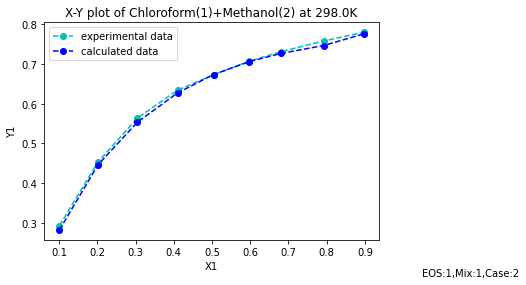

In [25]:
    import statistics
    os.getcwd()
    df=pd.read_csv('5th-Mixture-x-y.csv')
    x=df.iloc[:,0]
    y=df.iloc[:,1]
    
    df.plot( x = 'x', y = 'y',linestyle='--',marker ='o',color = 'c')
    plt.plot(X1,Y1,linestyle='--',marker ='o',color = 'b')
    plt.title('X-Y plot of Chloroform(1)+Methanol(2) at {}K'.format(T))
    plt.legend(["experimental data","calculated data"])
    plt.figtext(1,0,"EOS:{},Mix:{},Case:{}".format(eos,mix,case))
    plt.xlabel('X1')
    plt.ylabel('Y1')
    plt.savefig("X1-Y1-5th-Mix,{},{},{},{}.PNG".format(T,eos,mix,case),bbox_inches='tight')
    plt.show()

array('f', [0.14621204137802124, 0.5265873074531555, 0.5326840281486511, 0.37234941124916077, 0.3381340503692627, 0.4181397259235382, 0.4849768280982971, 0.5169396996498108, 0.6389648914337158])
avg_RMS: 0.462


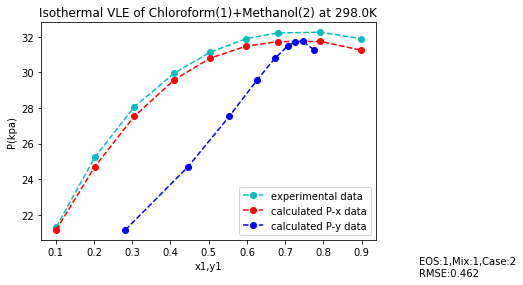

In [26]:
    os.getcwd()
    df=pd.read_csv('5th-Mixture.csv')
    x=df.iloc[:,0]
    y=df.iloc[:,1]
    error = arr.array('f',[])
    err_sqr = arr.array('f',[])
    for i in range(0,len(X1)):
        e = abs(P[i]-y[i])
        u = e**2
        error.append(e)
        err_sqr.append(u)
    print(error)
    avg = round(statistics.mean(err_sqr),3)
    avg_RMS = round(avg**0.5,3)
    print("avg_RMS:",avg_RMS)
    
   
    df.plot( x = 'x', y = 'y',linestyle='--',marker ='o',color = 'c')
    plt.plot(X1,P,linestyle='--',marker ='o',color = 'r')
    plt.plot(Y1,P,linestyle='--',marker ='o',color = 'b')
    plt.title('Isothermal VLE of Chloroform(1)+Methanol(2) at {}K'.format(T))
    plt.legend(["experimental data","calculated P-x data","calculated P-y data"])
    plt.xlabel('x1,y1')
    plt.ylabel('P(kpa)')
    plt.figtext(1,0,"EOS:{},Mix:{},Case:{}\nRMSE:{}".format(eos,mix,case,avg_RMS))
    plt.savefig("5th-Mix,{},{},{},{}.PNG".format(T,eos,mix,case),bbox_inches='tight',dpi =200)
    plt.show()

In [27]:
    f = open('5th-Mix-fin-error.csv','a')
    f.write(str(T))
    f.write('\n')
    f.write(str(eos))
    f.write('\n')
    f.write(str(mix))
    f.write('\n')
    f.write(str(case))
    f.write('\n')
    f.write(str(avg_RMS))
    f.write('\n')
    f.write("".join(str(P)))
    f.write('\n')
    f.write("".join(str(Y1)))
    f.write('\n')
    f.write("".join(str(gamma1)))
    f.write('\n')
    f.write("".join(str(gamma2)))
    f.write('\n')
    f.write("".join(str(phi1)))
    f.write('\n')
    f.write("".join(str(phi2)))
    f.close()
    
    del error,P,X1,Y1,Y2,X2,Z1sat,Z2sat,a2,b2,V1sat,V2sat,T,eos,alpha_eos_1,alpha_eos_2
    del gam1,gam2,P1sat,P2sat,phi1sat,phi2sat
    del Pcf_1,Pcf_2,Phi_1,Phi_2,Pnew
    del Vmix,bmix,a12,y1,y2,a1,b1,a11,a22,amix
    del bmix,Pold,eos,alpha_eos_1
    del a1a2,A12,A21,V1_L,V2_L
    del case,alpha,omega_eos_1,omega_eos_2,mix

NameError: name 'bmix' is not defined